In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customer = pd.read_csv('dim_customers.csv')

In [ ]:
customer.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [ ]:
spends = pd.read_csv('fact_spends.csv')
spends.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [ ]:
avg_spend = sum(spends['spend'])/6
avg_spend

88482959.16666667

In [ ]:
avg_income = sum(customer['avg_income'])
avg_income

206628129

In [ ]:
avg_spend/avg_income*100

42.82232026921498

## **Demographic Analysis**

In [ ]:
Total_customer = customer['customer_id'].drop_duplicates().count()
print('Total customer',Total_customer)

Total customer 4000


In [ ]:
male_female_customer = customer.groupby('gender')['customer_id'].count().sort_values(ascending=False)
male_female_customer

gender
Male      2597
Female    1403
Name: customer_id, dtype: int64

In [ ]:
customer_by_age_group = customer.groupby('age_group')['customer_id'].count().sort_values(ascending=False)
customer_by_age_group

age_group
25-34    1498
35-45    1273
21-24     691
45+       538
Name: customer_id, dtype: int64

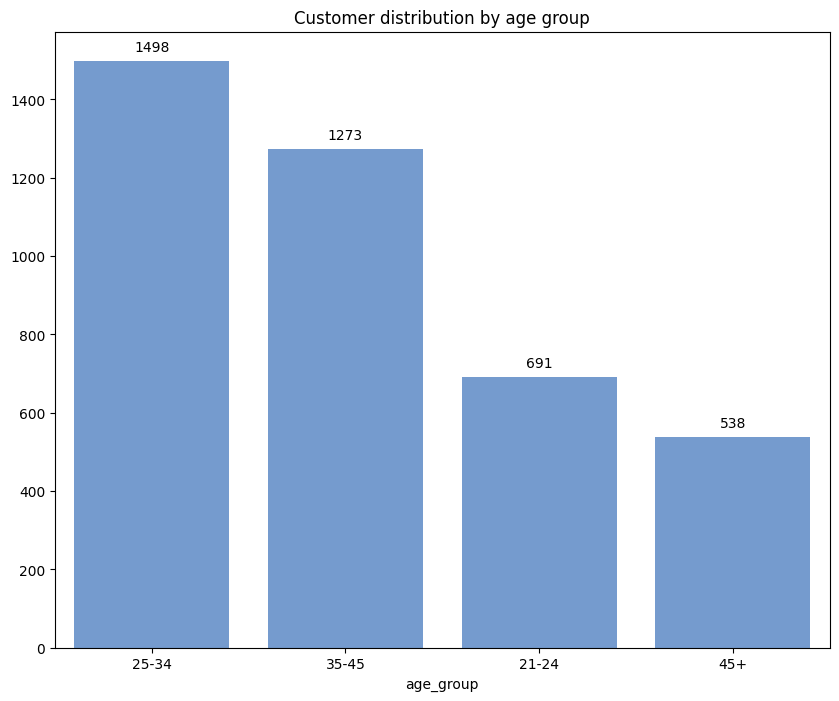

In [ ]:
# plt.bar(customer_by_age_group.index, customer_by_age_group.values, )
# plt.legend()
plt.figure(figsize=(10,8))

ax = sns.barplot(x=customer_by_age_group.index, y=customer_by_age_group.values, color='#69d')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Customer distribution by age group')
plt.show()


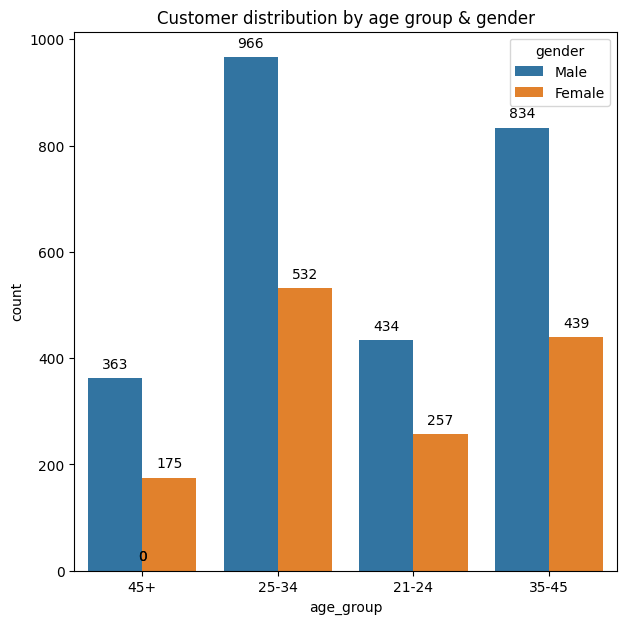

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x='age_group', data=customer, hue='gender')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Customer distribution by age group & gender')
plt.show()

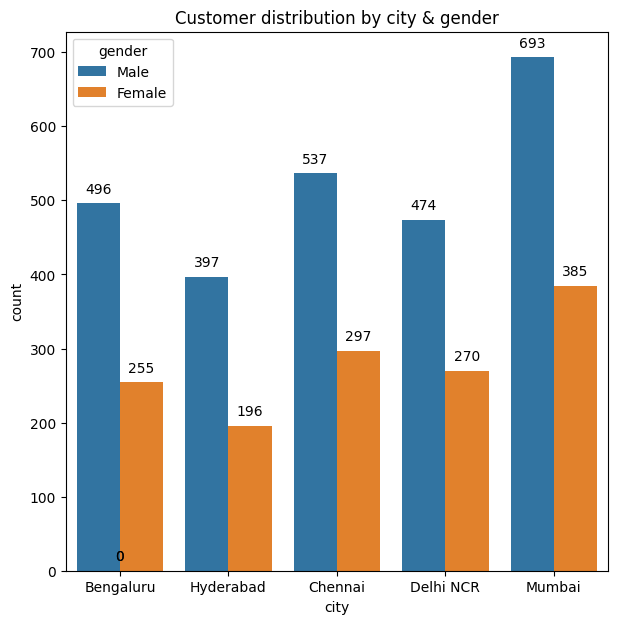

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x='city', data=customer, hue='gender')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Customer distribution by city & gender')
plt.show()

<ipython-input-490-0744e511543e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


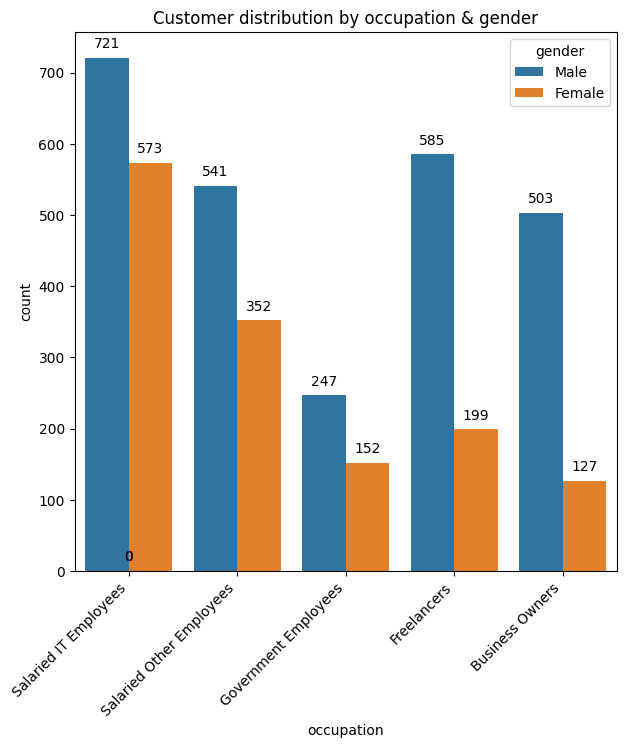

In [ ]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x='occupation', data=customer, hue='gender')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Customer distribution by occupation & gender')
plt.show()

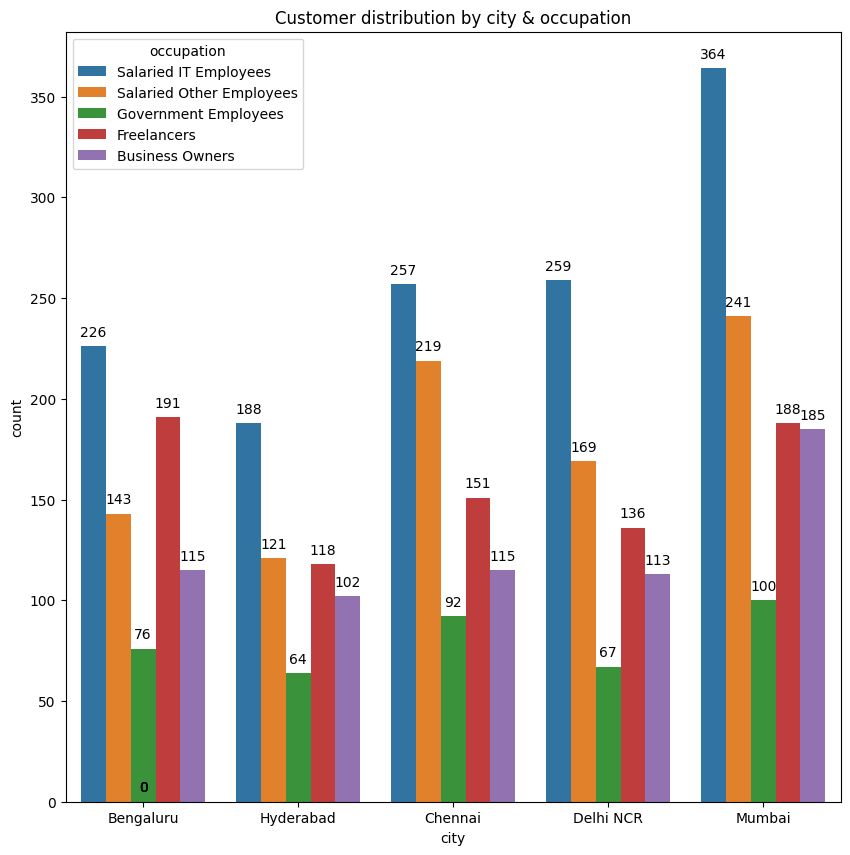

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x='city', data=customer, hue='occupation')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Customer distribution by city & occupation')
plt.show()

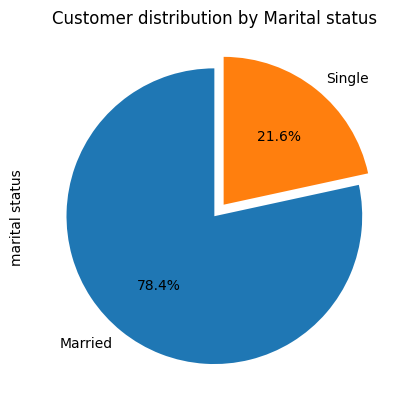

In [ ]:
# plt.figure(figsize=(8,7))
# ax = sns.countplot(x='occupation', data=customer)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# for p in ax.patches:
#     ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

explode = (0, 0.1)
customer['marital status'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=explode, startangle=90)
plt.title('Customer distribution by Marital status')
plt.show()

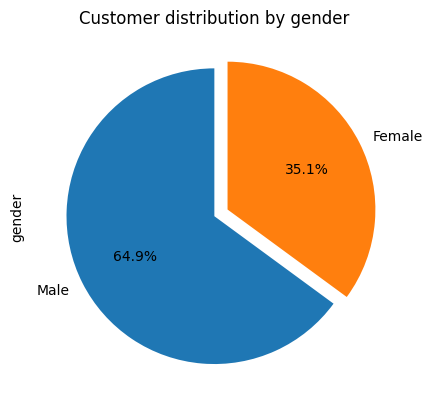

In [ ]:
explode = (0, 0.1)
customer['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=explode, startangle=90)
plt.title('Customer distribution by gender')
plt.show()

In [ ]:
customer_spends_data = pd.merge(customer,spends, on='customer_id', how='inner')

In [ ]:
customer_spends_data.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334


In [ ]:

unique_customers = customer_spends_data.drop_duplicates(subset='customer_id')

active_customer = unique_customers.groupby('city')['customer_id'].count()
active_customer

city
Bengaluru     751
Chennai       834
Delhi NCR     744
Hyderabad     593
Mumbai       1078
Name: customer_id, dtype: int64

In [ ]:
!pip install squarify


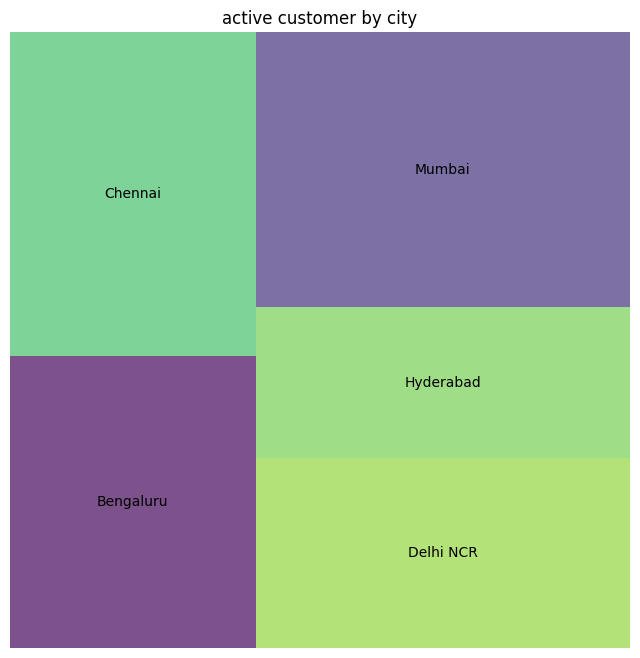

In [ ]:
import squarify


# Create a squarify plot
plt.figure(figsize=(8, 8))
squarify.plot(sizes=active_customer.values, label=active_customer.index, alpha=0.7)
plt.axis('off')  # Turn off axis labels
plt.title('active customer by city')
plt.show()

## Spend Analysis

In [ ]:
customer_spends_data.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month,category,payment_type,spend
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Electronics,Net Banking,405
1,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Groceries,Debit Card,1096
2,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,June,Bills,Credit Card,2765
3,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,September,Apparel,Debit Card,363
4,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,May,Food,Debit Card,334


In [ ]:
unique_customers = customer_spends_data.drop_duplicates(subset=['customer_id','month'])

total_income = unique_customers['avg_income'].sum()/1000000
print('Total Income', round(total_income,2), 'M')

Total Income 1239.77 M


In [ ]:
total_spend = customer_spends_data['spend'].sum()/1000000
print('Total spend', round(total_spend,2),'M')

Total spend 530.9 M


In [ ]:
unique_customers = customer_spends_data.drop_duplicates(subset=['customer_id','month'])

total_income = unique_customers['avg_income'].mean()
print('Average monthly income by individual', round(total_income,2), 'k')

Average monthly income by individual 51657.03 k


In [ ]:
avg_spend = sum(spends['spend'])/6
avg_spend

88482959.16666667

In [ ]:
avg_income = sum(customer['avg_income'])
avg_income

206628129

In [ ]:
print('Avg Income Unilisation', round((avg_spend/avg_income)*100,2), '%')

Avg Income Unilisation 42.82 %


In [ ]:
# (customer_spends_data['spend'].sum()/6)/customer_spends_data['avg_income'].mean()

1712.8928107685992

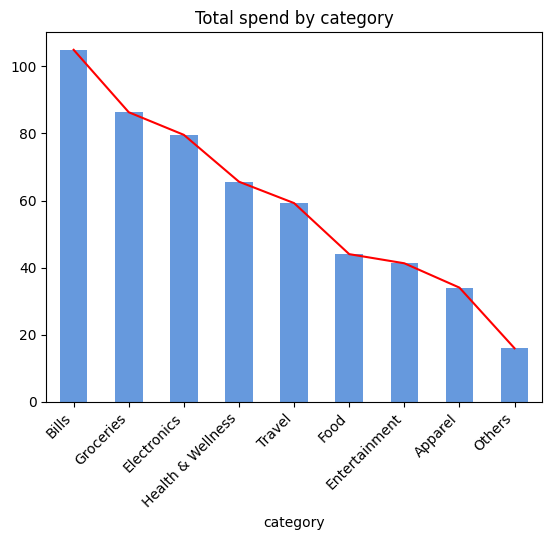

In [ ]:
(customer_spends_data.groupby('category')['spend'].sum()/1000000).sort_values(ascending=False).plot(color='red')
(customer_spends_data.groupby('category')['spend'].sum()/1000000).sort_values(ascending=False).plot(kind='bar',color='#69d')
plt.xticks(rotation=45, ha='right')

plt.title('Total spend by category')
plt.show()

In [ ]:
unique_customers = customer_spends_data.drop_duplicates(subset=['customer_id','month'])

total_income = unique_customers.groupby('age_group')['avg_income'].sum()/1000000
total_income=total_income.reset_index()
total_income

,age_group,avg_income
0,21-24,168.817956
1,25-34,465.821832
2,35-45,408.067440
3,45+,197.061546


In [ ]:
total_spend = customer_spends_data.groupby('age_group')['spend'].sum()/1000000
total_spend=total_spend.reset_index()
total_spend

,age_group,spend
0,21-24,68.523077
1,25-34,203.357184
2,35-45,190.639828
3,45+,68.377666


In [ ]:
income_utilization = (round((customer_spends_data.groupby('age_group')['spend'].sum()/6)/(customer.groupby('age_group')['avg_income'].sum()),2)*100).reset_index()
income_utilization

,age_group,0
0,21-24,41.0
1,25-34,44.0
2,35-45,47.0
3,45+,35.0


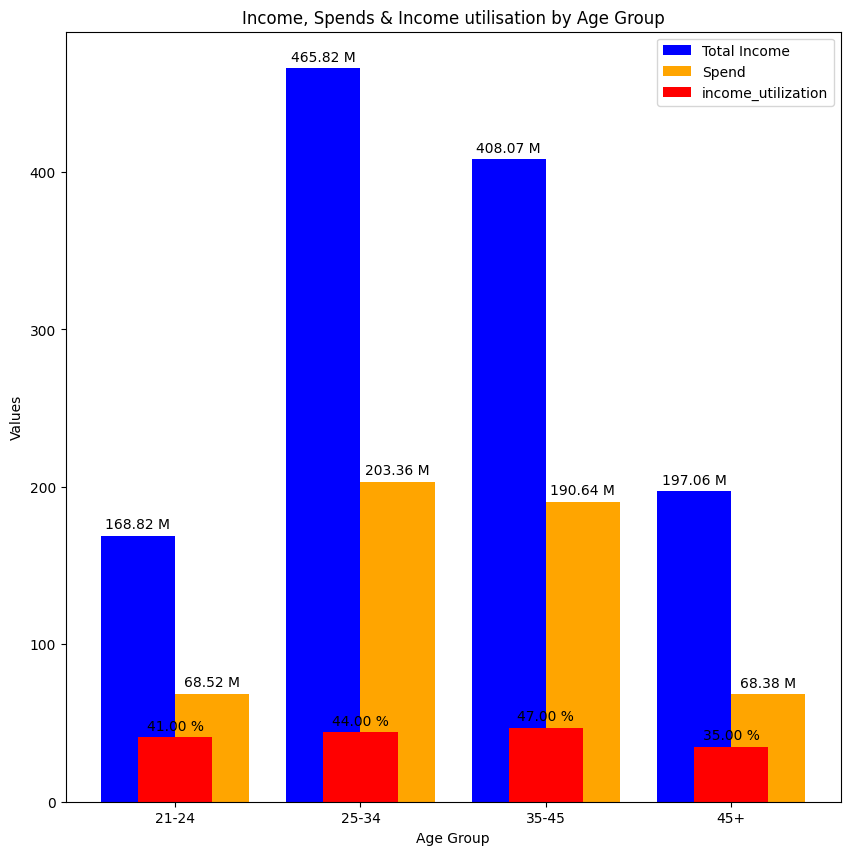

In [ ]:
import numpy as np


# Create subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the bars
bar_width = 0.4
income_bars=ax.bar(np.arange(total_income.shape[0]) - 0.2, total_income['avg_income'], width=bar_width, color='blue', label='Total Income')
spend_bars=ax.bar(np.arange(total_spend.shape[0]) + 0.2, total_spend['spend'], width=bar_width, color='orange', label='Spend')
utilization_bars=ax.bar(np.arange(total_spend.shape[0]),income_utilization[0],width=bar_width, color='red', label='income_utilization')


def add_data_labels(bars, unit):
    for rect in bars:
        height = rect.get_height()
        ax.annotate(f'{height:.2f} {unit}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Call the function for each set of bars with the corresponding unit
add_data_labels(income_bars, 'M')
add_data_labels(spend_bars, 'M')
add_data_labels(utilization_bars, '%')

# Set x-axis ticks and labels
plt.xticks(np.arange(total_income.shape[0]), total_income['age_group'])

# Add titles and legend
plt.title('Income, Spends & Income utilisation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
unique_customers = customer_spends_data.drop_duplicates(subset=['customer_id','month'])

total_income_by_occupation = unique_customers.groupby('occupation')['avg_income'].sum()/1000000
total_income_by_occupation=total_income_by_occupation.reset_index()
total_income_by_occupation

,occupation,avg_income
0,Business Owners,264.944658
1,Freelancers,164.914026
2,Government Employees,124.571394
3,Salaried IT Employees,477.483462
4,Salaried Other Employees,207.855234


In [ ]:
total_spend_by_occupation = customer_spends_data.groupby('occupation')['spend'].sum()/1000000
total_spend_by_occupation=total_spend_by_occupation.reset_index()
total_spend_by_occupation

,occupation,spend
0,Business Owners,88.004709
1,Freelancers,75.538638
2,Government Employees,36.122418
3,Salaried IT Employees,243.720304
4,Salaried Other Employees,87.511686


In [ ]:
income_utilization_by_occupation = (round((customer_spends_data.groupby('occupation')['spend'].sum()/6)/(customer.groupby('occupation')['avg_income'].sum()),2)*100).reset_index()
income_utilization_by_occupation

,occupation,0
0,Business Owners,33.0
1,Freelancers,46.0
2,Government Employees,29.0
3,Salaried IT Employees,51.0
4,Salaried Other Employees,42.0


<ipython-input-452-6eff706fa7f2>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


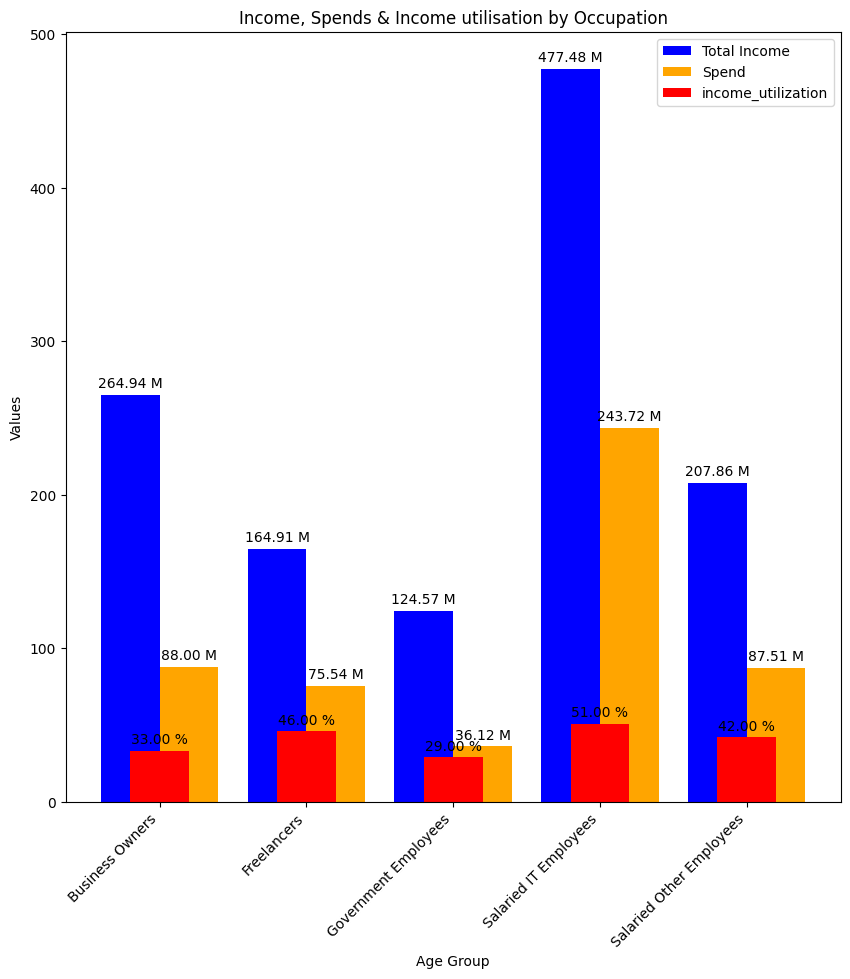

In [ ]:
import numpy as np


# Create subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the bars
bar_width = 0.4
income_bars=ax.bar(np.arange(total_spend_by_occupation.shape[0]) - 0.2, total_income_by_occupation['avg_income'], width=bar_width, color='blue', label='Total Income')
spend_bars=ax.bar(np.arange(total_spend_by_occupation.shape[0]) + 0.2, total_spend_by_occupation['spend'], width=bar_width, color='orange', label='Spend')
utilization_bars=ax.bar(np.arange(total_spend_by_occupation.shape[0]),income_utilization_by_occupation[0],width=bar_width, color='red', label='income_utilization')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

def add_data_labels(bars, unit):
    for rect in bars:
        height = rect.get_height()
        ax.annotate(f'{height:.2f} {unit}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Call the function for each set of bars with the corresponding unit
add_data_labels(income_bars, 'M')
add_data_labels(spend_bars, 'M')
add_data_labels(utilization_bars, '%')

# Set x-axis ticks and labels
plt.xticks(np.arange(total_spend_by_occupation.shape[0]), total_spend_by_occupation['occupation'])

# Add titles and legend
plt.title('Income, Spends & Income utilisation by Occupation')
plt.xlabel('Age Group')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()


In [ ]:
unique_customers = customer_spends_data.drop_duplicates(subset=['customer_id','month'])

total_income_by_city = unique_customers.groupby('city')['avg_income'].sum()/1000000
total_income_by_city=total_income_by_city.reset_index()
total_income_by_city

,city,avg_income
0,Bengaluru,230.136114
1,Chennai,256.812246
2,Delhi NCR,232.050594
3,Hyderabad,186.242826
4,Mumbai,334.526994


In [ ]:
total_spend_by_city = customer_spends_data.groupby('city')['spend'].sum()/1000000
total_spend_by_city=total_spend_by_city.reset_index()
total_spend_by_city

,city,spend
0,Bengaluru,100.018029
1,Chennai,79.871509
2,Delhi NCR,111.449559
3,Hyderabad,67.520175
4,Mumbai,172.038483


In [ ]:
income_utilization_by_city = (round((customer_spends_data.groupby('city')['spend'].sum()/6)/(customer.groupby('city')['avg_income'].sum()),2)*100).reset_index()
income_utilization_by_city

,city,0
0,Bengaluru,43.0
1,Chennai,31.0
2,Delhi NCR,48.0
3,Hyderabad,36.0
4,Mumbai,51.0


<ipython-input-457-5247044a5f5f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


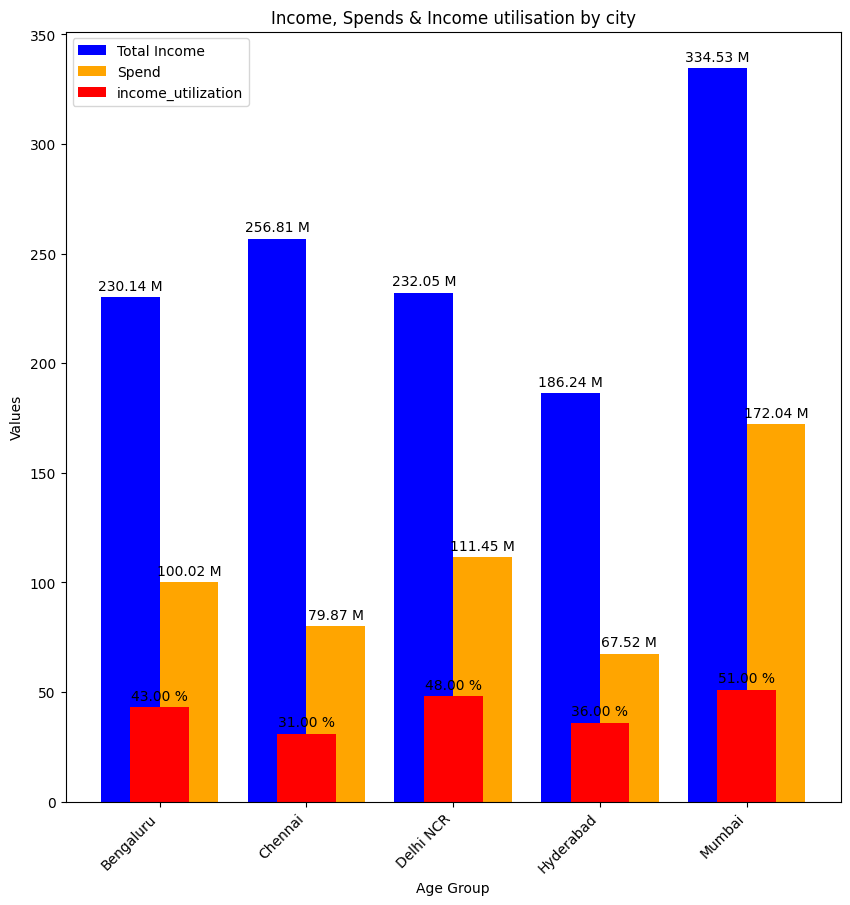

In [ ]:
import numpy as np


# Create subplots
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the bars
bar_width = 0.4
income_bars=ax.bar(np.arange(total_income_by_city.shape[0]) - 0.2, total_income_by_city['avg_income'], width=bar_width, color='blue', label='Total Income')
spend_bars=ax.bar(np.arange(total_income_by_city.shape[0]) + 0.2, total_spend_by_city['spend'], width=bar_width, color='orange', label='Spend')
utilization_bars=ax.bar(np.arange(total_income_by_city.shape[0]),income_utilization_by_city[0],width=bar_width, color='red', label='income_utilization')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

def add_data_labels(bars, unit):
    for rect in bars:
        height = rect.get_height()
        ax.annotate(f'{height:.2f} {unit}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Call the function for each set of bars with the corresponding unit
add_data_labels(income_bars, 'M')
add_data_labels(spend_bars, 'M')
add_data_labels(utilization_bars, '%')

# Set x-axis ticks and labels
plt.xticks(np.arange(total_income_by_city.shape[0]), total_income_by_city['city'])

# Add titles and legend
plt.title('Income, Spends & Income utilisation by city')
plt.xlabel('Age Group')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()


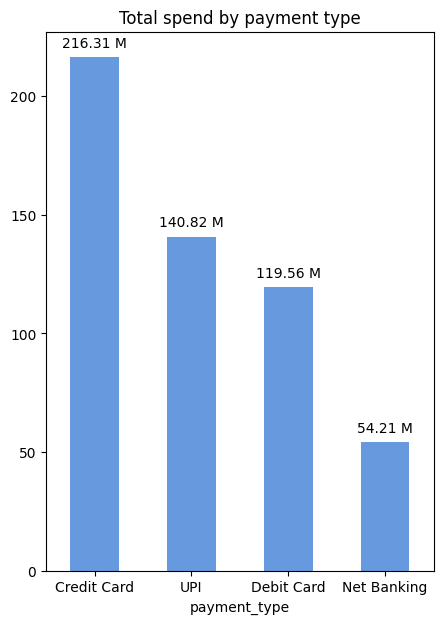

In [ ]:
plt.figure(figsize=(5,7))
ax =(customer_spends_data.groupby('payment_type')['spend'].sum()/1000000).sort_values(ascending=False).plot(kind='bar',color='#69d')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f} M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Total spend by payment type')
plt.show()

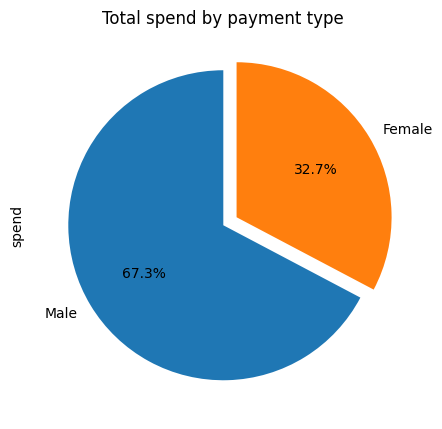

In [ ]:
plt.figure(figsize=(5,7))
ax =(customer_spends_data.groupby('gender')['spend'].sum()/1000000).sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%',explode=explode, startangle=90)

plt.title('Total spend by payment type')
plt.show()

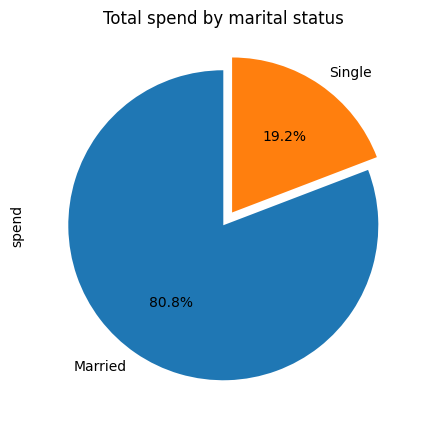

In [ ]:
plt.figure(figsize=(5,7))
ax =(customer_spends_data.groupby('marital status')['spend'].sum()/1000000).
sort_values(ascending=False).plot(kind='pie',autopct='%1.1f%%',explode=explode, startangle=90)

plt.title('Total spend by marital status')
plt.show()

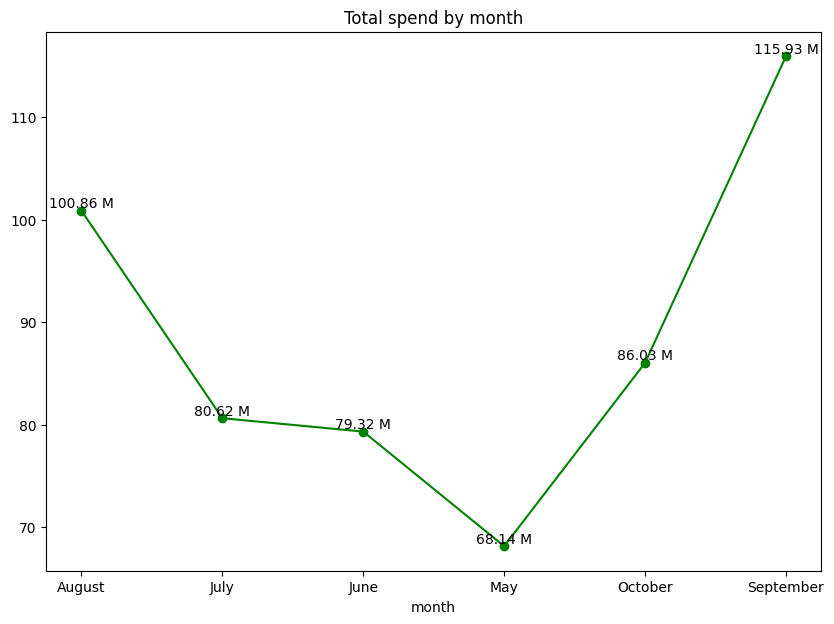

In [ ]:
plt.figure(figsize=(10,7))
ax =(customer_spends_data.groupby('month')['spend'].sum()/1000000).plot(color='green', marker='o')

plt.title('Total spend by month')

for i, value in enumerate(customer_spends_data.groupby('month')['spend'].sum() / 1000000):
    ax.text(i, value, f'{value:.2f} M', ha='center', va='bottom')
    # ax.annotate(f'{value:.2f} M', (i, value), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

In [ ]:
unique_customers = customer_spends_data.drop_duplicates(subset=['customer_id','month'])

total_income_by_gender = unique_customers.groupby('gender')['avg_income'].sum()/1000000
total_income_by_gender=total_income_by_gender.reset_index()
total_income_by_gender

,gender,avg_income
0,Female,435.216714
1,Male,804.552060


In [ ]:
total_spend_by_gender = customer_spends_data.groupby('gender')['spend'].sum()/1000000
total_spend_by_gender=total_spend_by_gender.reset_index()
total_spend_by_gender

,gender,spend
0,Female,173.759718
1,Male,357.138037


In [ ]:
income_utilization_by_gender = (round((customer_spends_data.groupby('gender')['spend'].sum()/6)/
 (customer.groupby('gender')['avg_income'].sum()),2)*100).reset_index()
income_utilization_by_gender

,gender,0
0,Female,40.0
1,Male,44.0


<ipython-input-475-0f2d30bd2e2e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


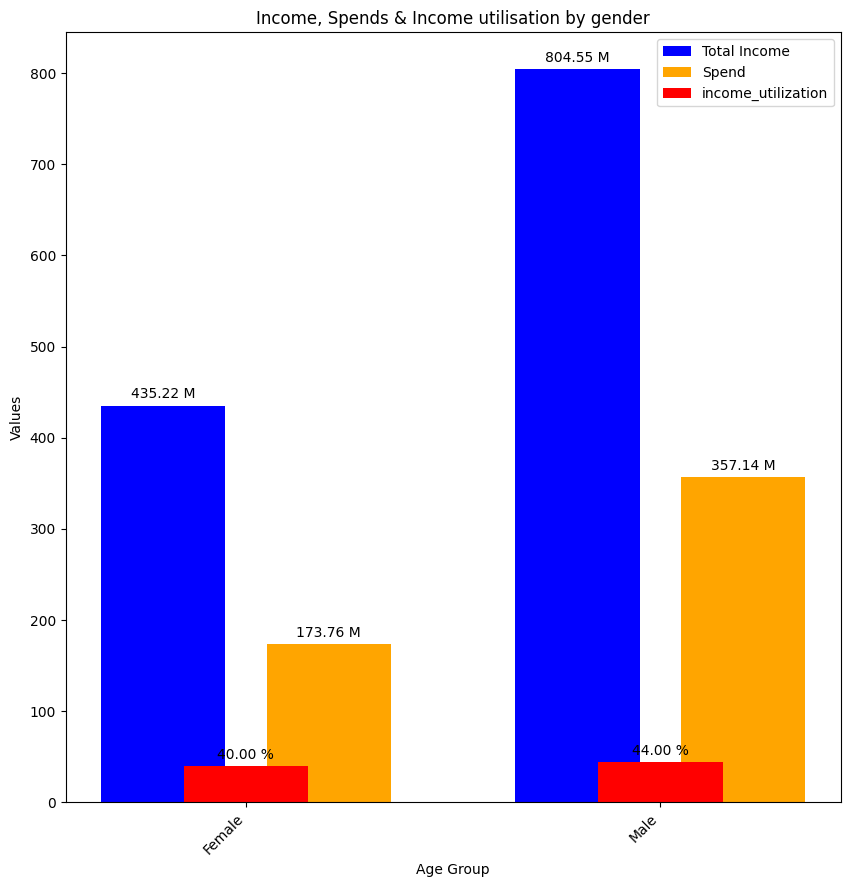

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the bars
bar_width = 0.3
income_bars=ax.bar(np.arange(total_income_by_gender.shape[0]) - 0.2,
                   total_income_by_gender['avg_income'], width=bar_width, color='blue', label='Total Income')
spend_bars=ax.bar(np.arange(total_income_by_gender.shape[0]) + 0.2,
                  total_spend_by_gender['spend'], width=bar_width, color='orange', label='Spend')
utilization_bars=ax.bar(np.arange(total_income_by_gender.shape[0]),
                        income_utilization_by_gender[0],width=bar_width, color='red', label='income_utilization')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

def add_data_labels(bars, unit):
    for rect in bars:
        height = rect.get_height()
        ax.annotate(f'{height:.2f} {unit}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Call the function for each set of bars with the corresponding unit
add_data_labels(income_bars, 'M')
add_data_labels(spend_bars, 'M')
add_data_labels(utilization_bars, '%')

# Set x-axis ticks and labels
plt.xticks(np.arange(total_income_by_gender.shape[0]), total_income_by_gender['gender'])

# Add titles and legend
plt.title('Income, Spends & Income utilisation by gender')
plt.xlabel('Age Group')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
unique_customers = customer_spends_data.drop_duplicates(subset=['customer_id','month'])

total_income_by_marriage = unique_customers.groupby('marital status')['avg_income'].sum()/1000000
total_income_by_marriage=total_income_by_marriage.reset_index()
total_income_by_marriage

,marital status,avg_income
0,Married,1003.203540
1,Single,236.565234


In [ ]:
total_spend_by_marriage = customer_spends_data.groupby('marital status')['spend'].sum()/1000000
total_spend_by_marriage=total_spend_by_marriage.reset_index()
total_spend_by_marriage

,marital status,spend
0,Married,429.029573
1,Single,101.868182


In [ ]:
income_utilization_by_marriage = (round((customer_spends_data.groupby('marital status')['spend'].sum()/6)
/(customer.groupby('marital status')['avg_income'].sum()),2)*100).reset_index()
income_utilization_by_marriage

,marital status,0
0,Married,43.0
1,Single,43.0


<ipython-input-498-53b34b1496e3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


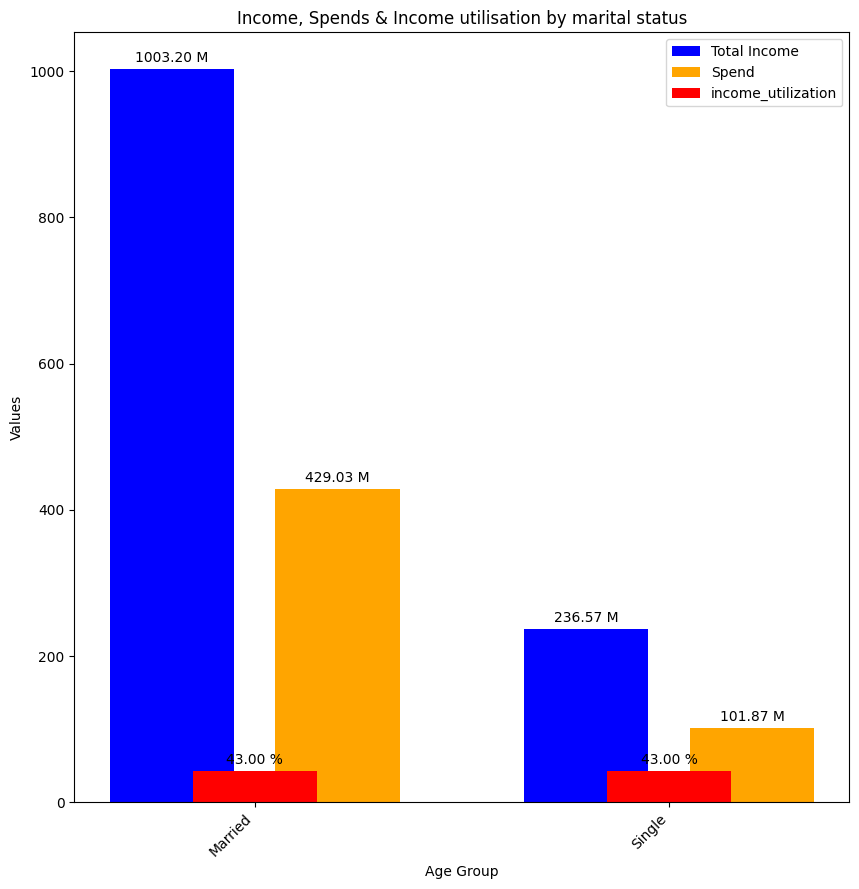

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the bars
bar_width = 0.3
income_bars=ax.bar(np.arange(total_income_by_marriage.shape[0]) - 0.2,
                   total_income_by_marriage['avg_income'], width=bar_width, color='blue', label='Total Income')
spend_bars=ax.bar(np.arange(total_income_by_marriage.shape[0]) + 0.2,
                  total_spend_by_marriage['spend'], width=bar_width, color='orange', label='Spend')
utilization_bars=ax.bar(np.arange(total_income_by_marriage.shape[0]),
                        income_utilization_by_marriage[0],width=bar_width, color='red', label='income_utilization')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

def add_data_labels(bars, unit):
    for rect in bars:
        height = rect.get_height()
        ax.annotate(f'{height:.2f} {unit}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Call the function for each set of bars with the corresponding unit
add_data_labels(income_bars, 'M')
add_data_labels(spend_bars, 'M')
add_data_labels(utilization_bars, '%')

# Set x-axis ticks and labels
plt.xticks(np.arange(total_income_by_marriage.shape[0]), total_income_by_marriage['marital status'])

# Add titles and legend
plt.title('Income, Spends & Income utilisation by marital status')
plt.xlabel('Age Group')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
unique_customers = customer_spends_data.drop_duplicates(subset=['customer_id','month'])

total_income_by_payment = unique_customers.groupby('payment_type')['avg_income'].sum()/1000000
total_income_by_payment=total_income_by_payment.reset_index()
total_income_by_payment

,payment_type,avg_income
0,Credit Card,310.555716
1,Debit Card,313.277869
2,Net Banking,305.477162
3,UPI,310.458027


In [ ]:
total_spend_by_payment = customer_spends_data.groupby('payment_type')['spend'].sum()/1000000
total_spend_by_payment=total_spend_by_payment.reset_index()
total_spend_by_payment

,payment_type,spend
0,Credit Card,216.308873
1,Debit Card,119.557229
2,Net Banking,54.208430
3,UPI,140.823223


<ipython-input-511-3e7735ef54a4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


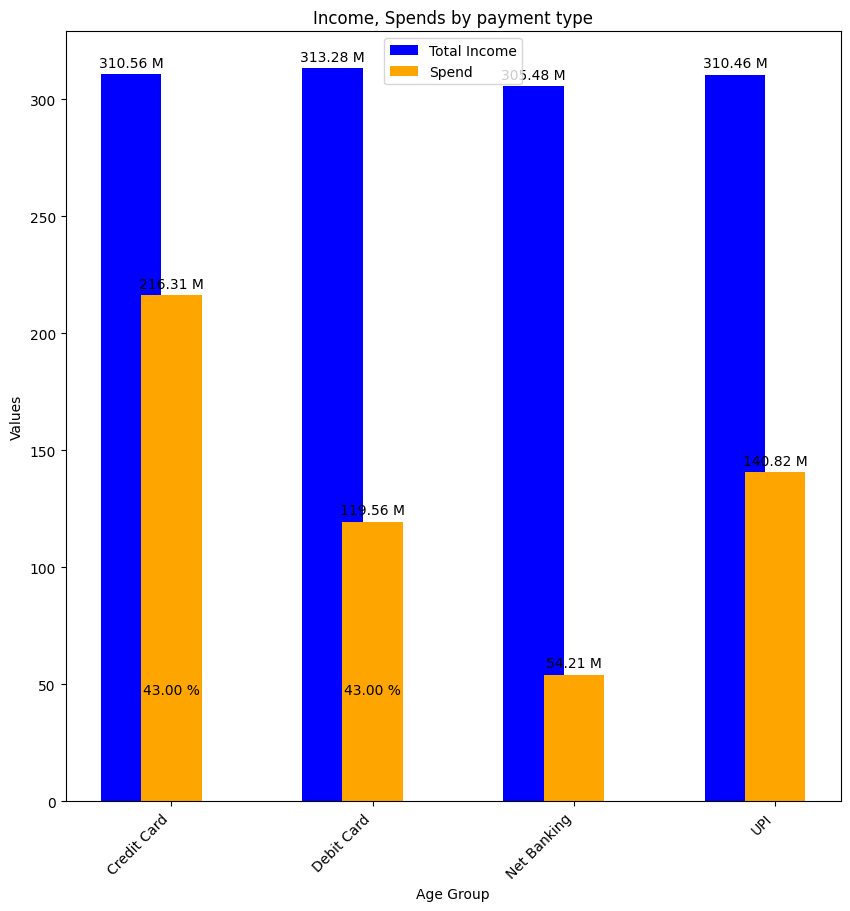

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the bars
bar_width = 0.3
income_bars=ax.bar(np.arange(total_spend_by_payment.shape[0]) - 0.2,
                   total_income_by_payment['avg_income'], width=bar_width, color='blue', label='Total Income')
spend_bars=ax.bar(np.arange(total_spend_by_payment.shape[0]),
                  total_spend_by_payment['spend'], width=bar_width, color='orange', label='Spend')


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

def add_data_labels(bars, unit):
    for rect in bars:
        height = rect.get_height()
        ax.annotate(f'{height:.2f} {unit}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Call the function for each set of bars with the corresponding unit
add_data_labels(income_bars, 'M')
add_data_labels(spend_bars, 'M')
add_data_labels(utilization_bars, '%')

# Set x-axis ticks and labels
plt.xticks(np.arange(total_spend_by_payment.shape[0]), total_spend_by_payment['payment_type'])

# Add titles and legend
plt.title('Income, Spends by payment type')
plt.xlabel('Age Group')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()

# Pivot **Tables**

In [ ]:
pivot_table_spend = round(pd.pivot_table(customer_spends_data, values='spend', index='category', columns='payment_type', aggfunc='sum', fill_value=0, margins=True, margins_name='Total')/1000000,2)
pivot_table_total_spend = pivot_table_spend.applymap(lambda x: f'{x:.2f} M')
# Display the pivot table
print('Total Spend')
print(pivot_table_total_spend)

Total Spend
payment_type      Credit Card Debit Card Net Banking       UPI     Total
category                                                                
Apparel               13.97 M     8.32 M      3.52 M    8.23 M   34.04 M
Bills                 46.33 M    25.34 M     10.81 M   22.43 M  104.91 M
Electronics           35.18 M    15.74 M      7.49 M   21.14 M   79.56 M
Entertainment         17.10 M     8.28 M      4.03 M   11.88 M   41.29 M
Food                  15.43 M     9.12 M      4.51 M   14.96 M   44.01 M
Groceries             27.17 M    21.40 M      9.14 M   28.60 M   86.30 M
Health & Wellness     27.68 M    16.48 M      7.15 M   14.29 M   65.60 M
Others                 6.83 M     3.29 M      1.67 M    4.17 M   15.96 M
Travel                26.61 M    11.60 M      5.89 M   15.12 M   59.22 M
Total                216.31 M   119.56 M     54.21 M  140.82 M  530.90 M


In [ ]:
unique_customers = customer_spends_data.drop_duplicates(subset=['customer_id','month'])

pivot_table_income = round(pd.pivot_table(unique_customers, values='avg_income', index='category', columns='payment_type', aggfunc='sum', fill_value=0, margins=True, margins_name='Total')/1000000,2)
pivot_table_total_income = pivot_table_income.applymap(lambda x: f'{x:.2f} M')
# Display the pivot table
print('Total Income')
print(pivot_table_total_income)

Total Income
payment_type      Credit Card Debit Card Net Banking       UPI      Total
category                                                                 
Apparel               34.58 M    36.29 M     33.30 M   38.11 M   142.28 M
Bills                 33.06 M    34.27 M     33.78 M   33.25 M   134.36 M
Electronics           35.84 M    36.85 M     33.30 M   34.41 M   140.40 M
Entertainment         35.58 M    35.03 M     33.86 M   31.76 M   136.22 M
Food                  34.09 M    32.61 M     32.94 M   35.42 M   135.06 M
Groceries             32.04 M    34.59 M     32.82 M   33.03 M   132.49 M
Health & Wellness     36.68 M    35.30 M     34.31 M   34.42 M   140.71 M
Others                35.00 M    33.42 M     34.71 M   34.13 M   137.27 M
Travel                33.68 M    34.92 M     36.45 M   35.94 M   140.99 M
Total                310.56 M   313.28 M    305.48 M  310.46 M  1239.77 M


In [ ]:
print('income uitilization')

income_uitilization_table= round((pivot_table_spend/pivot_table_income)*100, 2)
income_uitilization = income_uitilization_table.applymap(lambda x: f'{x:.2f} %')
print(income_uitilization)

income uitilization
payment_type      Credit Card Debit Card Net Banking      UPI    Total
category                                                              
Apparel               40.40 %    22.93 %     10.57 %  21.60 %  23.92 %
Bills                140.14 %    73.94 %     32.00 %  67.46 %  78.08 %
Electronics           98.16 %    42.71 %     22.49 %  61.44 %  56.67 %
Entertainment         48.06 %    23.64 %     11.90 %  37.41 %  30.31 %
Food                  45.26 %    27.97 %     13.69 %  42.24 %  32.59 %
Groceries             84.80 %    61.87 %     27.85 %  86.59 %  65.14 %
Health & Wellness     75.46 %    46.69 %     20.84 %  41.52 %  46.62 %
Others                19.51 %     9.84 %      4.81 %  12.22 %  11.63 %
Travel                79.01 %    33.22 %     16.16 %  42.07 %  42.00 %
Total                 69.65 %    38.16 %     17.75 %  45.36 %  42.82 %
